In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv('1.01. Simple linear regression.csv')

In [4]:
df.shape

(84, 2)

In [6]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [14]:
df.isna().sum()

SAT    0
GPA    0
dtype: int64

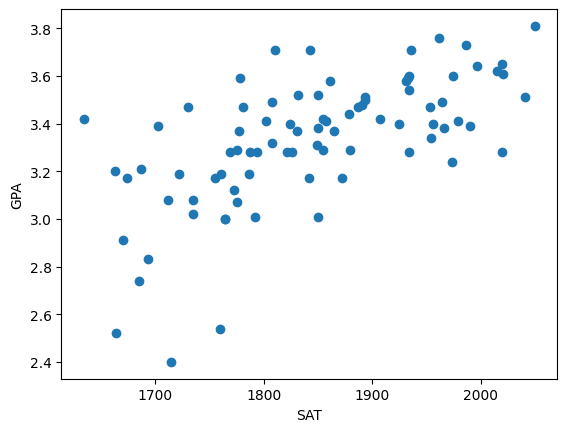

In [18]:
plt.scatter(df['SAT'],df['GPA'])
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [60]:
# find outlier using z score
from scipy import stats

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)

num_outliers = outliers.sum()
print(f"Number of outliers: {num_outliers}")

Number of outliers: 2


<AxesSubplot:xlabel='GPA'>

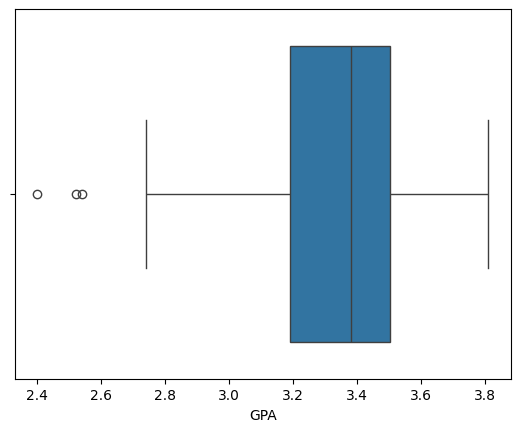

In [61]:
import seaborn as sns
sns.boxplot(x=df['GPA'])

In [62]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
outliers = (df < lower_threshold) | (df > upper_threshold)

print(outliers.sum())

SAT    0
GPA    3
dtype: int64


In [69]:
df_cleaned = df[~((df < lower_threshold) |(df > upper_threshold)).any(axis=1)]
df_cleaned.shape

(81, 2)

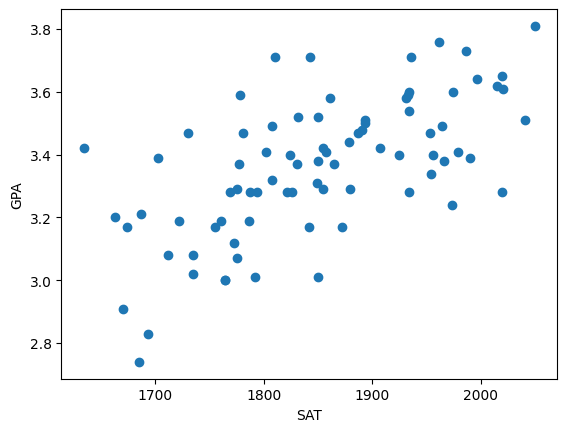

In [80]:
plt.scatter(df_cleaned['SAT'],df_cleaned['GPA'])
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

<AxesSubplot:xlabel='GPA'>

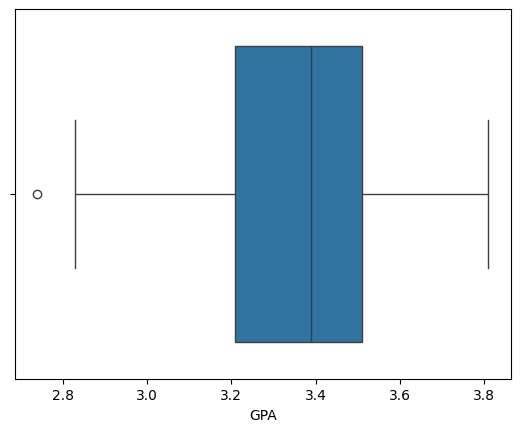

In [81]:
import seaborn as sns
sns.boxplot(x=df_cleaned['GPA'])

<AxesSubplot:xlabel='GPA'>

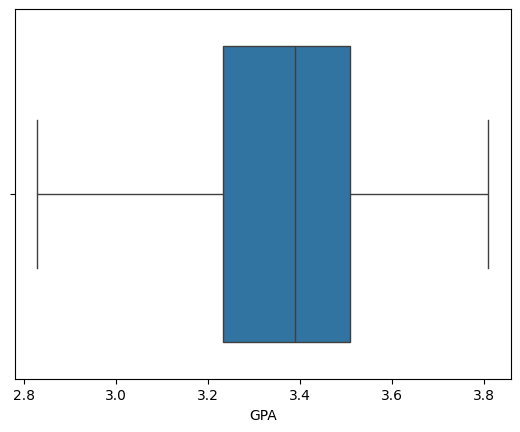

In [79]:
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
outliers = (df_cleaned < lower_threshold) | (df_cleaned > upper_threshold)

# print(outliers.sum())

df_final = df_cleaned[~((df_cleaned < lower_threshold) |(df_cleaned > upper_threshold)).any(axis=1)]
df_final.shape

import seaborn as sns
sns.boxplot(x=df_final['GPA'])

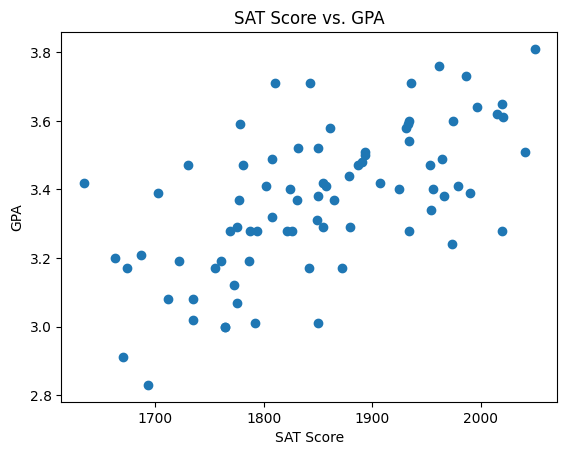

In [85]:
plt.scatter(df_final['SAT'], df_final['GPA'])
plt.title('SAT Score vs. GPA')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.show()

In [117]:
X = df_final[['SAT']]         # Independent variable (SAT Score)
Y = df_final['GPA']           # Dependent variable (GPA)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

In [118]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [119]:
y_pred = model.predict(X_test)

In [120]:
coefficients = model.coef_
y_intercept = model.intercept_

mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
r2score = metrics.r2_score(y_test,y_pred)
rss = ((y_pred-y_test)**2).sum()

# Display coefficients and intercept
print(f"Coefficients: {coefficients}")
print(f"Intercept: {y_intercept}")

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Residual Sum of Squares: {rss}")
print(f"R-Squared Score: {r2score}")

Coefficients: [0.00122088]
Intercept: 1.108657877417082
Mean Squared Error: 0.02553124552591344
Mean Absolute Error: 0.1358371903861911
Residual Sum of Squares: 0.408499928414615
R-Squared Score: 0.36915470435068665


In [121]:
model.score(X_test,y_test)

0.36915470435068665

In [122]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64, 1)
(16, 1)
(64,)
(16,)


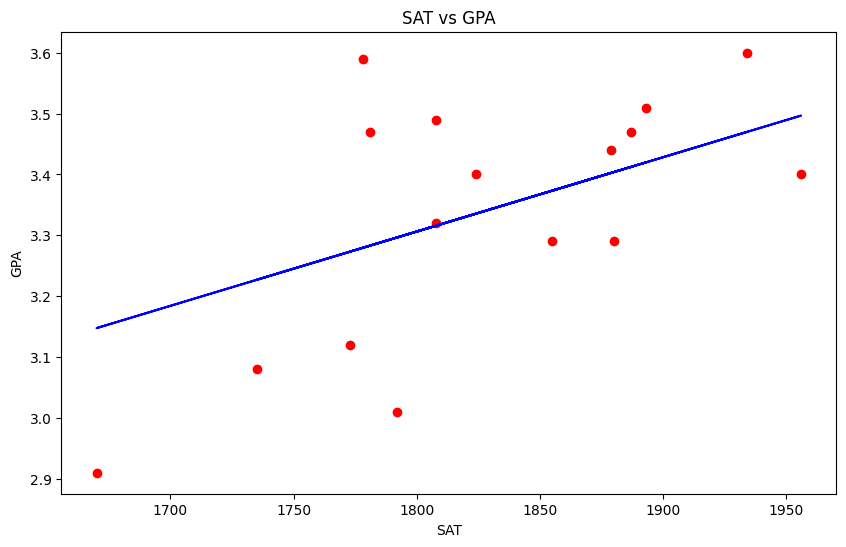

In [124]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test.values, y_pred, color='blue') 
plt.title("SAT vs GPA")
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()